In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model, load_model
from castor import director

Using TensorFlow backend.


In [2]:
for spec, para in director("pollux"):
    assert spec.shape == (1, 62, 62, 1)
    assert para.shape == (1, 3)
    break

In [3]:
MODEL = load_model("pollux.hdf5")

In [4]:
OUTFIT = np.load("pollux.npy")
scaler = MinMaxScaler(); scaler.fit(OUTFIT)
OUTPUT = scaler.transform(OUTFIT)

In [5]:
PREDIC = MODEL.predict_generator(director("pollux"), steps=len(OUTPUT))

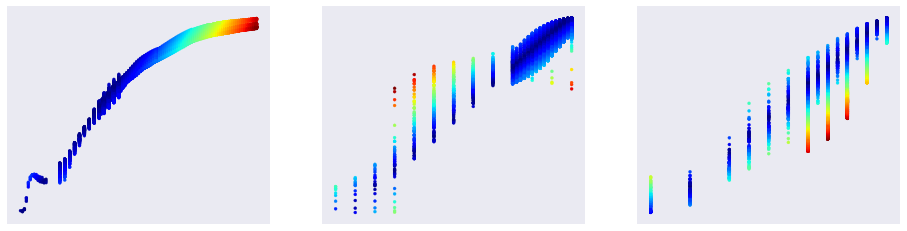

In [6]:
plt.figure(figsize=(16,4))
for i in range(3):
    plt.subplot(131+i)
    plt.xticks([]); plt.yticks([])
    plt.scatter(OUTPUT[:,i], PREDIC[:,i], s=9, cmap="jet",
                c=np.abs(PREDIC[:,i] - OUTPUT[:,i]))